In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract

In [3]:
filename = "videos/VID_20210114_115552.mp4"

cap = cv2.VideoCapture(filename)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"{width}x{height}, {n_frames} frames, {fps} fps, {n_frames / fps}s duration")

1920x1080, 41684 frames, 30.035594913275737 fps, 1387.8200222222222s duration


True


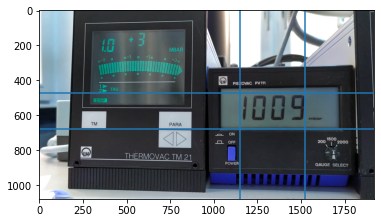

In [25]:
frame_buffer = np.empty((height, width, 3), dtype=np.uint8)

ret, _ = cap.read(frame_buffer)

print(ret)
plt.imshow(frame_buffer)

rect_inds = [
    [470, 1150],
    [680, 1525]
]

for y_ind, x_ind in rect_inds:
    plt.axhline(y_ind)
    plt.axvline(x_ind)

True

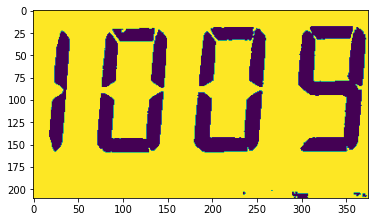

In [26]:
subarr = frame_buffer[rect_inds[0][0]:rect_inds[1][0], rect_inds[0][1]:rect_inds[1][1], :]
_, subarr = cv2.threshold(subarr, 70, 255, cv2.THRESH_BINARY)
subarr = subarr.max(axis=-1)
plt.imshow(subarr)
cv2.imwrite("subarr.png", subarr)

In [30]:
print(pytesseract.image_to_string(subarr, lang='letsgodigital', config='--psm 8'))

1889



In [79]:
print(pytesseract.get_languages())

['eng', 'osd']


In [22]:
frame_buffer = np.empty((height, width, 3), dtype=np.uint8)

for i in range(100):
    ret, _ = cap.read(frame_buffer)
    print(pytesseract.image_to_string(frame_buffer, output_type=pytesseract.Output.DICT))

{'text': ' \n\n \n\n \n\nqa PIEZOVAC PV1Tt\n\nOL ofr 200 “P2000 |\ni ’ i\nae |\n\na\n\nPOWER GAUGE SELECT\n\n \n\x0c'}
{'text': '  \n \n\nPIEZOVAC PV 111\n\n \n\n1500\nei OFF 200 tole, 2000\n\nPOWER GAUGE SELECT\n\n \n\x0c'}
{'text': ' \n\n    \n\n1500\n1 orF 200 | 2000 |\n\nrafal |\n|\nPOWER GAUGE SELECT\n\n \n\x0c'}
{'text': ' \n\n \n\n \n\nq) PIEZOVAC PV1T1\n\n1 ofr\n\nPOWER\n\nGAUGE SELECT\n\n \n\n \n\x0c'}
{'text': ' \n\n \n\n \n\n15\ndol Cys 00% 1°2000\n‘\n\nPIEZOVAC PV111\n\ncal |\n|\nPOWER GAUGE SELECT\n\n \n\x0c'}
{'text': ' \n\noe\n\nqW PIEZOVAC PVII1\n\n \n\n \n\n \n\nPARA\n©) |\nF oO orr 200 "P2000\nGW THERMOVAC TM 24 A |\nPOWER GAUGE SELECT\n\n \n\n \n\x0c'}
{'text': ' \n\nft) PIEZOVAC PV111\n\n \n\n \n\n \n\nPARA\n— ON\n1800\n<> ire zo0""fP2000 |\n\n-1\nTHERMOVAC TM 21 a\n\nPOWER GAUGE SELECT\n\n \n\n \n\x0c'}
{'text': '   \n\n1500\n1 orF a |\ni\n\n|\n\nPOWER GAUGE SELECT\n\n \n\x0c'}
{'text': '    \n\nPIEZOVAC PV1t1\n\n \n\n \n\n \n\nSa) |\n1500\n<> ere = |\n\n=i\nTHERMO

KeyboardInterrupt: 